In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [313]:
e = 1.602e-19 # C
me = 9.109e-31 # Kg
h = 6.626e-34 # Js
L = 0.135 # m
d1 = 213e-12 # m
d2 = 123e-12 #m

In [314]:
#Carga de datos
data = pd.read_excel("Datos- Difracción de electrones.xlsx")
data

,U (KV),D1(cm),D2 (cm),Incertdiumbre D1,Incertdiumbre D2
0,2.6,1.51,2.66,0.18,0.26
1,2.8,1.42,2.60,0.20,0.32
2,3.0,1.37,2.51,0.23,0.33
3,3.2,1.33,2.37,0.17,0.16
4,3.4,1.30,2.35,0.22,0.24
5,3.6,1.25,2.30,0.20,0.24
6,3.8,1.22,2.27,0.18,0.24
7,4.0,1.18,2.16,0.19,0.19
8,4.2,1.17,2.12,0.18,0.18
9,4.4,1.12,2.11,0.21,0.21


In [315]:
voltage = data["U (KV)"].astype(float).to_numpy() #[V] = kV
D1 = data["D1(cm)"].astype(float).to_numpy() #[D1] = cm
D2 = data["D2 (cm)"].astype(float).to_numpy() #[D2] = cm
sigma_d1 = data["Incertdiumbre D1"].astype(float).to_numpy()
sigma_d2 = data["Incertdiumbre D2"].astype(float).to_numpy()
sigma_voltage = 0.1 #[V] = kV

In [316]:
def wavelenght_DeBroglie(voltage, sigma):
    
    voltage1 = voltage * 1e3
    sigma1 = sigma * 1e3
    
    wavelength = h/np.sqrt(2 * e * voltage1 * me)
    wavelength *= 1e12

    sigma_w =  wavelength * sigma1/(2 * voltage1)
    
    return wavelength, sigma_w

In [330]:
def wavelength_Bragg(D, sigma, d):
    D1 = D * 1e-2
    sigma1 = sigma * 1e-2
    arg = 1/2 * np.arctan(D1/(2*L))
    wavelength = 2 * d * np.sin(arg)
    
    theta = 0.5 * np.arctan(D1 / (2 * L))
    dfdD = (2 * d * np.cos(theta)) / (4 * L * (1 + (D1 / (2 * L))**2))
    sigma_w = abs(dfdD) * sigma1
    
    wavelength *= 1e12
    sigma_w *= 1e12
    return wavelength, sigma_w

In [318]:
wave_deBroglie, sigma_w_deBroglie = wavelenght_DeBroglie(voltage, sigma_voltage)
wave_bragg1, sigma_w_bragg1 = wavelength_Bragg(D1, sigma_d1, d1)
wave_bragg2, sigma_w_bragg2 = wavelength_Bragg(D2, sigma_d2, d2) 

## Tabla

In [329]:
## Tabla
tabla = {"Voltaje $\pm$ 0.1 (KV)":[str(i) for i in voltage], "D1 (cm)":[str(D1[i]) + "$\pm$" + str(sigma_d1[i]) for i in range(0, len(D1))],
         "D2 (cm)": [str(D2[i]) + "$\pm$" + str(sigma_d2[i]) for i in range(0, len(D2))], 
         "$\lambda_{deBroglie}$ (pm)": [f"{wave_deBroglie[i]:.2f} $\pm$ {sigma_w_deBroglie[i]:.2f}" for i in range(0, len(wave_deBroglie))], 
         "$\lambda_{Bragg}^1$ (pm)": [f"{wave_bragg1[i]:.2f} $\pm$  {sigma_w_bragg1[i]:.2f}" for i in range(0, len(wave_bragg1))],
         "$\lambda_{Bragg}^2$ (pm)": [f"{wave_bragg2[i]:.2f} $\pm$ {sigma_w_bragg2[i]:.2f}" for i in range(0, len(wave_bragg2))]}
tabla = pd.DataFrame(tabla)
tabla = tabla.to_latex()
print(tabla)

\begin{tabular}{lllllll}
\toprule
 & Voltaje $\pm$ 0.1 (KV) & D1 (cm) & D2 (cm) & $\lambda_{deBroglie}$ (pm) & $\lambda_{Bragg}^1$ (pm) & $\lambda_{Bragg}^2$ (pm) \\
\midrule
0 & 2.6 & 1.51$\pm$0.18 & 2.66$\pm$0.26 & 24.05 $\pm$ 0.46 & 11.90 $\pm$  1.42 & 12.07 $\pm$ 1.17 \\
1 & 2.8 & 1.42$\pm$0.2 & 2.6$\pm$0.32 & 23.18 $\pm$ 0.41 & 11.19 $\pm$  1.57 & 11.80 $\pm$ 1.44 \\
2 & 3.0 & 1.37$\pm$0.23 & 2.51$\pm$0.33 & 22.39 $\pm$ 0.37 & 10.80 $\pm$  1.81 & 11.40 $\pm$ 1.49 \\
3 & 3.2 & 1.33$\pm$0.17 & 2.37$\pm$0.16 & 21.68 $\pm$ 0.34 & 10.48 $\pm$  1.34 & 10.77 $\pm$ 0.72 \\
4 & 3.4 & 1.3$\pm$0.22 & 2.35$\pm$0.24 & 21.03 $\pm$ 0.31 & 10.25 $\pm$  1.73 & 10.68 $\pm$ 1.08 \\
5 & 3.6 & 1.25$\pm$0.2 & 2.3$\pm$0.24 & 20.44 $\pm$ 0.28 & 9.85 $\pm$  1.57 & 10.45 $\pm$ 1.08 \\
6 & 3.8 & 1.22$\pm$0.18 & 2.27$\pm$0.24 & 19.90 $\pm$ 0.26 & 9.62 $\pm$  1.42 & 10.31 $\pm$ 1.08 \\
7 & 4.0 & 1.18$\pm$0.19 & 2.16$\pm$0.19 & 19.39 $\pm$ 0.24 & 9.30 $\pm$  1.50 & 9.82 $\pm$ 0.86 \\
8 & 4.2 & 1.17$\pm$0.18 & 

## Ajuste lineal

In [323]:
# D1
x = 1/ (voltage**1/2)

y1 = D1
weights = 1 / sigma_d1**2

coefficients1,cov1=np.polyfit(x, y1,1,cov=True, w= weights)
poly=np.poly1d(coefficients1)
y_trend_1 = poly(x)
residuals_1= (y1-poly(x)) 

In [324]:
# D2
y2 = D2
weights = 1 / sigma_d2**2


coefficients2,cov2=np.polyfit(x, y2, 1,cov=True, w= weights)
poly=np.poly1d(coefficients2)
y_trend_2 = poly(x)
residuals_2=y2-poly(x) 

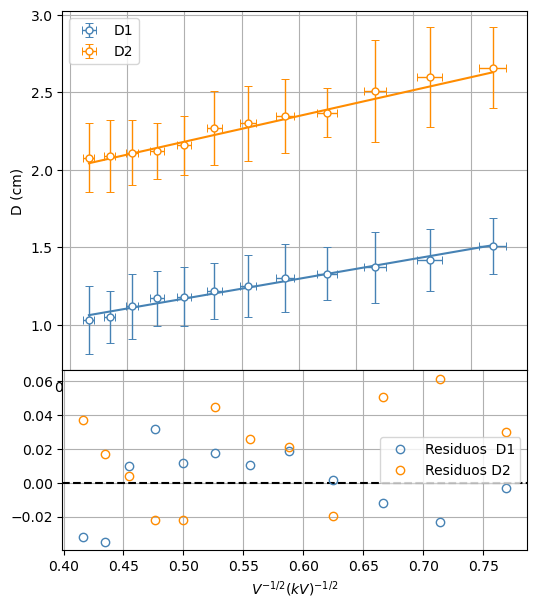

In [325]:
fig, axs = plt.subplots(2,1, sharex=False,figsize=(6,7), gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0)

axs[0].plot(x ,y_trend_1, ls="-", c="steelblue")
axs[0].plot(x ,y_trend_2, ls="-", c="darkorange")
data_1= axs[0].errorbar(x, y1, yerr=sigma_d1, xerr=[0.1]*len(x) / (2 * voltage**(3/2)), fmt="o", ecolor="steelblue", elinewidth=1., capsize=3,    
    capthick=0.7, markerfacecolor='white', markeredgecolor='steelblue', markersize=5, linestyle='None', label="D1")
axs[0].errorbar(x, y2, yerr=sigma_d2, xerr=[0.1]*len(x) / (2 * voltage**(3/2)), fmt="o", ecolor="darkorange", elinewidth=1., capsize=3,    
    capthick=0.7, markerfacecolor='white', markeredgecolor='darkorange', markersize=5, linestyle='None', label="D2")
axs[0].set_ylabel('D (cm)')
axs[0].legend(loc=0)
axs[0].grid("major")

#axs[0].text(1,-40,f'
#={r2}',fontsize=13)
#axs[0].text(-3,30,f'y=({m:.2f} x 
 #{sigma_m:.2f})+({b:.2f} 
 #{sigma_b:.2f})',fontsize=11)

axs[0].legend()

axs[1].axhline(y=0,color='k',linestyle='--')
axs[1].plot(x, residuals_1, linestyle='None', marker='o', markerfacecolor='none', markeredgecolor='steelblue', label='Residuos  D1')
axs[1].plot(x, residuals_2, linestyle='None', marker='o', markerfacecolor='none', markeredgecolor='darkorange', label='Residuos D2')
axs[1].grid("major")
axs[1].set_xlabel('$V^{-1/2} (kV)^{-1/2}$')
axs[1].legend()

plt.savefig("Ajuste lineal.jpeg")


## Pendiente

In [232]:
# D1
m1, b1 = coefficients1[0], b1 # [m1] = cm (kV)^1/2, [b1]= cm
sigma_m1, sigma_b1 = cov1[0,0], cov1[1,1]
print(f"pendiente = ({m1:.3f}$\pm${sigma_m1:.3f}) $cm (kV)^1/2$ intercepto = ({b1:.3f} $\pm$ {sigma_m1:.3f}) cm")

pendiente = (1.281$\pm$0.004) $cm (kV)^1/2$ intercepto = (0.528 $\pm$ 0.004) cm


In [233]:
# D2
m2, b2 = coefficients2[0], coefficients2[1]
sigma_m2, sigma_b2 = cov2[0,0] * (1000**(1/2)) * 1e-2, cov2[1,1]
print(f"pendiente = ({m2:.3f}$\pm${sigma_m1:.3f}) $cm (kV)^1/2$ intercepto = ({b2:.3f} $\pm$ {sigma_m2:.3f}) cm")

pendiente = (1.665$\pm$0.004) $cm (kV)^1/2$ intercepto = (1.349 $\pm$ 0.003) cm


### Calculo d

In [234]:
# [m] = m (V)^1/2
m1 *= (1000**(1/2)) *1e-2
sigma_m1 *= (1000**(1/2)) *1e-2
m2 *= (1000**(1/2)) *1e-2
sigma_m2 *= (1000**(1/2)) *1e-2

In [252]:
# d1
sigma_m1, sigma_b1 = cov1[0,0], cov1[1,1]
d1_experimental = L * h/(m1 * np.sqrt(2 * e* me))
d1_experimental = d1_experimental * 1e12 #[d2] = pm
sigma_d1 = d1_experimental * sigma_m1 / m1
print(f"d1 = ({d1_experimental:.1f} $\pm$ {sigma_d1:.1f}) pm")

d1 = (408.9 $\pm$ 3.6) pm


In [253]:
# d2
d2_experimental = L * h/( m2 * np.sqrt(2 * e* me))
d2_experimental = d2_experimental * 1e12 #[d2] = pm
sigma_d2 = d2_experimental * sigma_m2 / m2
print(f"d2 = ({d2_experimental:.1f} $\pm$ {sigma_d2:.1f}) pm")

d2 = (314.5 $\pm$ 0.5) pm


### Cálculo h

In [216]:
h_function = lambda m, d: (m * d *np.sqrt(2 * e * me)) / (2 * L)
sigma_h_function = lambda m, h, sigma: h * sigma / m

In [248]:
#d1
h1_experimental = h_function(m1, d1)
sigma_h1 = sigma_h_function(m1, h1_experimental, sigma_m1)
print(f"h = ({h1_experimental:.1e} $\pm$ {sigma_h1:.0e}) J s")

h = (1.7e-34 $\pm$ 2e-36) J s


In [250]:
#d2 
h2_experimental = h_function(m1, d2)
sigma_h2 = sigma_h_function(m2, h2_experimental, sigma_m2)
print(f"h = ({h2_experimental:.1e} $\pm$ {sigma_h2:.0e}) J s")

h = (1.0e-34 $\pm$ 2e-37) J s


## Precisión y exactitud

In [267]:
def errores_precision(theoric, experimental, sigma):
  prec= "no es preciso"
  exa= "no es exacto"
  abs_error = abs(theoric - experimental)
  presicion = sigma / experimental
  if  abs_error < 2.5 *sigma:
    exa = "es exacto"
  if presicion < 0.1:
    prec = "es preciso"
  return exa+ ", " + prec 

In [275]:
# d1
d1_theoric = 213.13 # pm
errores_precision(d1_theoric, d1_experimental, sigma_d1)

'no es exacto, es preciso'

In [276]:
# d2
d2_theoric = 123.05 # pm
errores_precision(d2_theoric, d2_experimental, sigma_d2)

'no es exacto, es preciso'

In [277]:
# h para d1
errores_precision(h, h1_experimental, sigma_h1)

'no es exacto, es preciso'

In [278]:
# h para d1
errores_precision(h, h2_experimental, sigma_h2)

'no es exacto, es preciso'